In [ ]:
import tarfile

# Path to the uploaded .tar.gz file
tar_gz_path = '/content/sqljdbc_12.8.1.0_enu.tar.gz'  # Update if necessary

# Extract the .tar.gz file
with tarfile.open(tar_gz_path, "r:gz") as tar:
    tar.extractall(path='/content/')

# Check the extracted contents
import os
extracted_files = os.listdir('/content/')
print(extracted_files)

#/content/sqljdbc_12.8/enu/jars/mssql-jdbc-12.8.1.jre8.jar

['.config', 'sqljdbc_12.8.1.0_enu.tar.gz', 'sqljdbc_12.8', 'sample_data']


In [2]:
!pip install pyspark
import os
from pyspark.sql import SparkSession

# Define JDBC JAR path
jdbc_jar_path = "/content/sqljdbc_12.8/enu/jars/mssql-jdbc-12.8.1.jre8.jar"

# Start Spark Session
spark = SparkSession.builder \
    .appName("SQL Server Connection") \
    .config("spark.driver.extraClassPath", jdbc_jar_path) \
    .config("spark.executor.extraClassPath", jdbc_jar_path) \
    .getOrCreate()
print(os.path.exists(jdbc_jar_path))



False


In [ ]:
#RESTART RUNTIME in order to driver to work

jdbc_url = "jdbc:sqlserver://datasciencechallenge.database.windows.net:1433;database=DATA;encrypt=true;trustServerCertificate=false;loginTimeout=30;"

properties = {
    "user": "candidate",
    "password": "DataForMe123",
    "driver": "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}

df = spark.read.jdbc(url=jdbc_url, table="training", properties=properties)

df.show()

+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|               image|image class|      date|                 bar|baz|                xgt|                 qgg|               lux|                 wsg|                yyz|                 drt|                gox|               foo|                boz|fyt|lgh|                hrt|               juu|             target|
+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|training-img/flow...|     flower|2016-04-0

In [ ]:
from pyspark.sql.functions import col, to_date

# Cast columns to correct types
df = df.withColumn("image", col("image").cast("string"))  # Example, adjust if needed
df = df.withColumn("image class", col("image class").cast("string"))
df = df.withColumn("date", to_date(col("date"), "yyyy-MM-dd"))  # Ensure date format is correct

# Check the schema to ensure correct data types
df.printSchema()

# Write to Parquet
df.write.parquet("/content/data.parquet", mode="overwrite")


root
 |-- image: string (nullable = true)
 |-- image class: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bar: string (nullable = true)
 |-- baz: string (nullable = true)
 |-- xgt: string (nullable = true)
 |-- qgg: string (nullable = true)
 |-- lux: string (nullable = true)
 |-- wsg: string (nullable = true)
 |-- yyz: string (nullable = true)
 |-- drt: string (nullable = true)
 |-- gox: string (nullable = true)
 |-- foo: string (nullable = true)
 |-- boz: string (nullable = true)
 |-- fyt: string (nullable = true)
 |-- lgh: string (nullable = true)
 |-- hrt: string (nullable = true)
 |-- juu: string (nullable = true)
 |-- target: string (nullable = true)



In [ ]:
dftrain= spark.read.parquet("/content/data.parquet")
dftrain.show()
df=dftrain

+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|               image|image class|      date|                 bar|baz|                xgt|                 qgg|               lux|                 wsg|                yyz|                 drt|                gox|               foo|                boz|fyt|lgh|                hrt|               juu|             target|
+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|training-img/flow...|     flower|2016-04-0

In [ ]:
df.printSchema()

root
 |-- image: string (nullable = true)
 |-- image class: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bar: string (nullable = true)
 |-- baz: string (nullable = true)
 |-- xgt: string (nullable = true)
 |-- qgg: string (nullable = true)
 |-- lux: string (nullable = true)
 |-- wsg: string (nullable = true)
 |-- yyz: string (nullable = true)
 |-- drt: string (nullable = true)
 |-- gox: string (nullable = true)
 |-- foo: string (nullable = true)
 |-- boz: string (nullable = true)
 |-- fyt: string (nullable = true)
 |-- lgh: string (nullable = true)
 |-- hrt: string (nullable = true)
 |-- juu: string (nullable = true)
 |-- target: string (nullable = true)



In [ ]:
df.describe().show()

+-------+--------------------+-----------+--------------------+------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+
|summary|               image|image class|                 bar|               baz|                 xgt|                 qgg|              lux|                 wsg|                 yyz|                 drt|                 gox|                 foo|                 boz|                fyt|                lgh|                hrt|               juu|             target|
+-------+--------------------+-----------+--------------------+------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------

In [ ]:
for col in df.columns:
  print(col+":", df[df[col].isNull()].count())

image: 0
image class: 0
date: 0
bar: 0
baz: 0
xgt: 0
qgg: 0
lux: 0
wsg: 0
yyz: 0
drt: 0
gox: 0
foo: 0
boz: 0
fyt: 0
lgh: 0
hrt: 0
juu: 0
target: 0


In [ ]:
columns_list = ['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'target']
def count_zeros():
  for i in columns_list:
    print(i+":",df[df[i]==0].count())

In [ ]:
count_zeros()

bar: 0
baz: 350
xgt: 0
qgg: 0
lux: 0
wsg: 0
yyz: 0
drt: 0
gox: 0
foo: 0
boz: 0
fyt: 358
lgh: 441
hrt: 0
juu: 0
target: 0


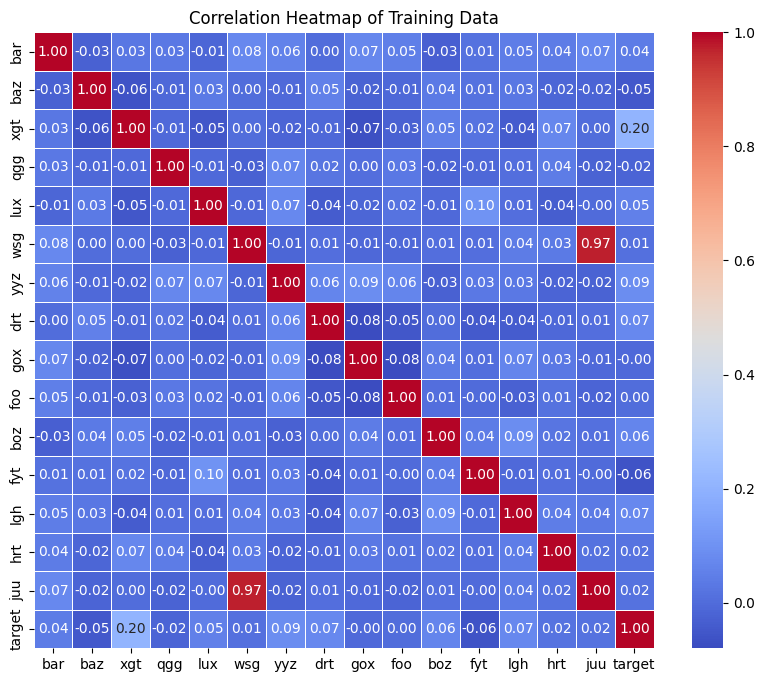

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import col, when

# Define the column list
columns_list = ['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'target']

# Cast columns to float in PySpark (handling invalid numbers)
for c in columns_list:
    df_alt = df.withColumn(c, when(col(c).rlike("^[0-9.]+$"), col(c).cast("double")).otherwise(None))

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df_alt.select(columns_list).toPandas()

# Ensure all columns are numeric in Pandas
pandas_df = pandas_df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = pandas_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title("Correlation Heatmap of Training Data")
plt.show()



In [ ]:
print(correlation_matrix)

             bar       baz       xgt       qgg       lux       wsg       yyz  \
bar     1.000000 -0.028553  0.027032  0.031546 -0.013467  0.075022  0.057385   
baz    -0.028553  1.000000 -0.061147 -0.010969  0.034188  0.000864 -0.006077   
xgt     0.027032 -0.061147  1.000000 -0.005438 -0.051937  0.002951 -0.016945   
qgg     0.031546 -0.010969 -0.005438  1.000000 -0.007552 -0.026951  0.071375   
lux    -0.013467  0.034188 -0.051937 -0.007552  1.000000 -0.010830  0.074745   
wsg     0.075022  0.000864  0.002951 -0.026951 -0.010830  1.000000 -0.013653   
yyz     0.057385 -0.006077 -0.016945  0.071375  0.074745 -0.013653  1.000000   
drt     0.001702  0.050948 -0.010104  0.023173 -0.037707  0.007109  0.064751   
gox     0.068449 -0.022082 -0.070430  0.004620 -0.015388 -0.010421  0.087856   
foo     0.048284 -0.011031 -0.028626  0.031262  0.018396 -0.011562  0.063709   
boz    -0.032158  0.037164  0.049785 -0.019018 -0.005906  0.007430 -0.025411   
fyt     0.014731  0.012958  0.019316 -0.

In [ ]:
!pip install pyarrow  # OR !pip install fastparquet


In [ ]:
import pandas as pd
import os

# Define the folder and file path
folder_path = "/content/data.correlation"
file_path = os.path.join(folder_path, "correlation_matrix.parquet")
# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
# Save the DataFrame as a Parquet file
correlation_matrix.to_parquet(file_path, engine="pyarrow")  # Or engine="fastparquet"

print(f"Parquet file saved successfully at: {file_path}")


Parquet file saved successfully at: /content/data.correlation/correlation_matrix.parquet


In [ ]:
# Calculate the correlation matrix
correlation_matrix = pandas_df.corr()
# Unstack the matrix into a series
correlation_series = correlation_matrix.unstack()
# Sort the series in descending order and filter out self-correlations
sorted_correlations = correlation_series[correlation_series < 1].sort_values(ascending=False)
# Print the top N most correlated pairs
top_n = 10  # You can change this number
print(sorted_correlations.head(top_n))

juu     wsg       0.974137
wsg     juu       0.974137
xgt     target    0.204820
target  xgt       0.204820
fyt     lux       0.102460
lux     fyt       0.102460
target  yyz       0.088041
yyz     target    0.088041
        gox       0.087856
gox     yyz       0.087856
dtype: float64


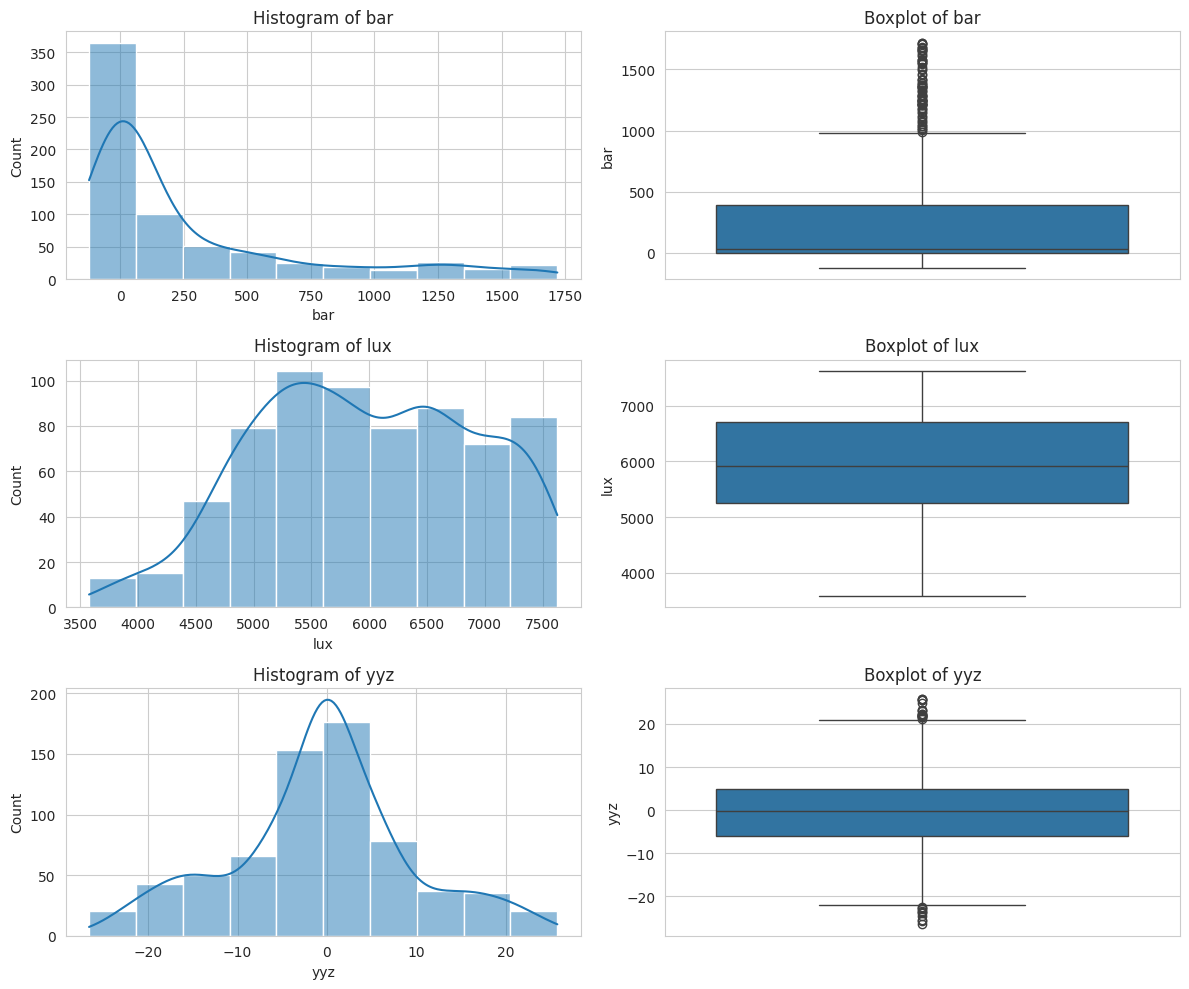

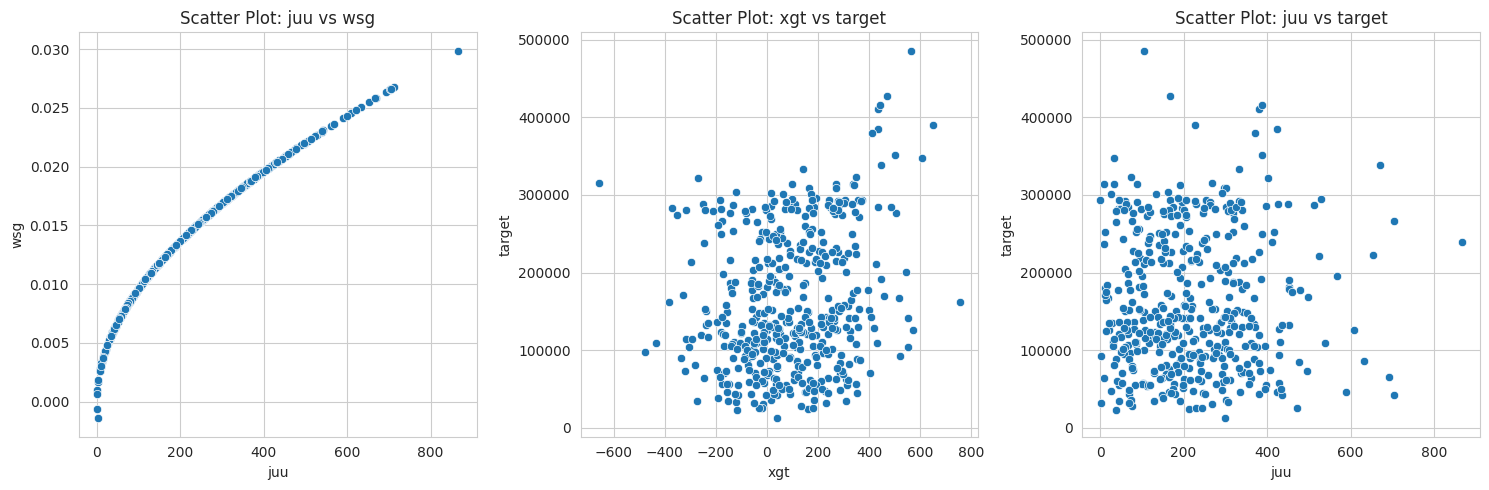

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with your actual DataFrame)
df_hist = pandas_df

# Set Seaborn style
sns.set_style("whitegrid")

# ----- Histograms -----
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
columns = ["bar", "lux", "yyz"]
#columns = ["juu", "wsg", "xgt"]
for i, col in enumerate(columns):
    sns.histplot(df_hist[col], bins=10, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of {col}")

    sns.boxplot(y=df_hist[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# ----- Scatter Plots -----
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# juu vs. wsg
sns.scatterplot(x=df_hist["juu"], y=df_hist["wsg"], ax=axes[0])
axes[0].set_title("Scatter Plot: juu vs wsg")

# xgt vs. target
sns.scatterplot(x=df_hist["xgt"], y=df_hist["target"], ax=axes[1])
axes[1].set_title("Scatter Plot: xgt vs target")

# juu vs. target
sns.scatterplot(x=df_hist["juu"], y=df_hist["target"], ax=axes[2])
axes[2].set_title("Scatter Plot: juu vs target")

plt.tight_layout()
plt.show()


## Linear Regression

Mean Squared Error (MSE): 3.19
R-squared (R²): -3213.52

Feature Importances:
    Feature  Coefficient
0      bar     0.438486
14     juu     0.400207
5      wsg     0.174717
6      yyz    -0.946670
10     boz    -1.191962
1      baz    -1.394193
13     hrt    -1.398455
12     lgh    -1.436126
3      qgg    -1.498013
11     fyt    -1.513520
4      lux    -1.519704
2      xgt    -1.715420
9      foo    -1.837765
8      gox    -1.849607
7      drt    -1.860651


<ipython-input-13-f52e45ac3651>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")


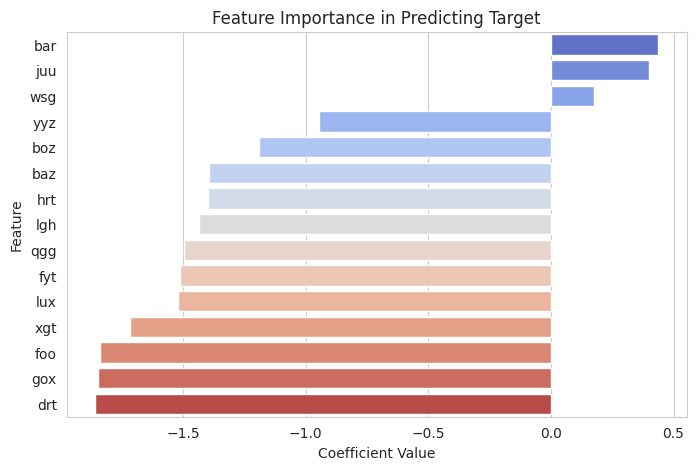

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_hist = correlation_matrix

# Step 1: Prepare the data
X = df_hist.drop(columns=["target"])  # Features
y = df_hist["target"]  # Target variable

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Feature Importance (Coefficients)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print("\nFeature Importances:\n", coefficients)
output_path = "/content/data.coefficient/coefficient.parquet"
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

coefficients.to_parquet(output_path, engine="pyarrow")

# Step 7: Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Target")
plt.show()



In [ ]:
dftrain= spark.read.parquet("/content/data.parquet")
dftrain.show()

+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|               image|image class|      date|                 bar|baz|                xgt|                 qgg|               lux|                 wsg|                yyz|                 drt|                gox|               foo|                boz|fyt|lgh|                hrt|               juu|             target|
+--------------------+-----------+----------+--------------------+---+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+------------------+-------------------+---+---+-------------------+------------------+-------------------+
|training-img/flow...|     flower|2016-04-0

Time Series Analysis

In [ ]:
# import libraries
!pip install --upgrade prophet

import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from prophet import Prophet

In [15]:
# dataframes creation for both training and testing datasets
dftrain= spark.read.parquet("/content/data.parquet")
dftrain_pd = dftrain.toPandas()
dftrain_pd.head()


,image,image class,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
0,training-img/flower/flower_79.jpg,flower,2016-04-05,-13.797745783851203,1,132.24470875514425,-14.88801872201585,7059.592259225923,0.01876048427176777,-10.131641319644267,-3.3144816968633233,-19.637941490204533,24.774894872679127,0.07767576338893759,1,0,-144.07860601236203,367.97783427175216,134340.06407984282
1,training-img/boat/boat_10.jpg,boat,2017-12-29,1370.968440665586,0,-53.01039645589046,-0.24963812977973132,5404.074707470747,0.014199145171670324,-0.8406724667636857,-57.50518571816879,-0.4770054679143539,43.99330072046682,4.266039015301385,1,1,-169.23262914693413,215.09410422805132,167657.6245502007
2,training-img/airplane/airplane_94.jpg,airplane,2016-06-28,1240.6158630608575,1,318.1031698982324,25.234515650768653,6435.785062154563,0.014365620723305913,-4.984576044078693,-0.22209667357081647,-9.07895666537972,2.4448795468925297,1.0354869830071756,1,1,-220.3493511149105,220.02702572915751,157211.30269840566
3,training-img/boat/boat_79.jpg,boat,2017-05-31,1258.3685162996246,0,221.06882097920672,-5.604372923353575,4915.487848784878,0.02196747275212649,6.189879905830826,-0.7327254092473499,2.3243115749197933,19.29056461490825,0.2069482896028223,0,0,-246.892242645665,495.7296584727068,-47320.6048670479
4,training-img/llama/llama_25.jpg,llama,2018-03-29,307.45801891084375,0,259.11085621501456,2.89688727881775,5285.831301422142,0.014829706917609714,-7.544631713772271,-22.70189592112171,3.066920926551218,11.17130789926544,0.5304660563106567,1,0,-199.51048746793475,234.04711920728118,-85209.683793766


In [16]:
dftrain_pd=dftrain_pd.sort_values(by='date')
dftrain_pd.head()

,image,image class,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
425,training-img/dog/dog_50.jpg,dog,2016-03-01,-0.12567635124258875,0,-120.310277271567,8.081389660275091,6340.483433189771,0.008793308253032435,0.3036089957592274,-1320.7447086819518,2.4037560085228,33.53211778160956,0.17380456435578634,0,0,81.89463013077318,83.87508089360962,-59103.64460155461
336,training-img/person/person_17.jpg,person,2016-03-02,1169.0091090399308,1,101.04924183727225,17.77724211059358,7500.665166516652,0.007768665242891734,10.824537816305906,-2183.043399314943,-17.389844910238736,28.286081294268353,0.5006168403400091,0,0,-183.829224579679,65.61538036136622,106706.79379530798
462,training-img/cartoon/cartoon_2.jpg,cartoon,2016-03-04,0.19909157152551954,0,-115.41398696105094,5.627180757668055,5939.876687668767,0.008778198743314088,-5.953481694199498,-22.04624636661668,-2.1614627070970798,22.78727897347963,0.24532833691780773,1,0,-92.33672596372293,83.59004915195204,-30562.54800423415
591,training-img/dog/dog_13.jpg,dog,2016-03-07,285.24330733062743,1,-43.59953505913896,13.999778807068367,6356.146714671468,0.005560644949998638,-19.612724884888515,-507.15800639442693,-13.271725602984882,23.352777305620876,0.9337651281192896,0,0,-130.92024759726507,33.7496673666009,114078.79672308949
151,training-img/dog/dog_27.jpg,dog,2016-03-07,-86.46137691247394,0,-74.59790614614298,-9.813760398303469,5376.881188118812,0.011387293477968038,22.311303206005437,-3.5801176494917364,-11.976914532480142,50.208067150757245,0.46025342982710993,0,0,-385.3041787611934,139.67854857742003,112595.74342848387


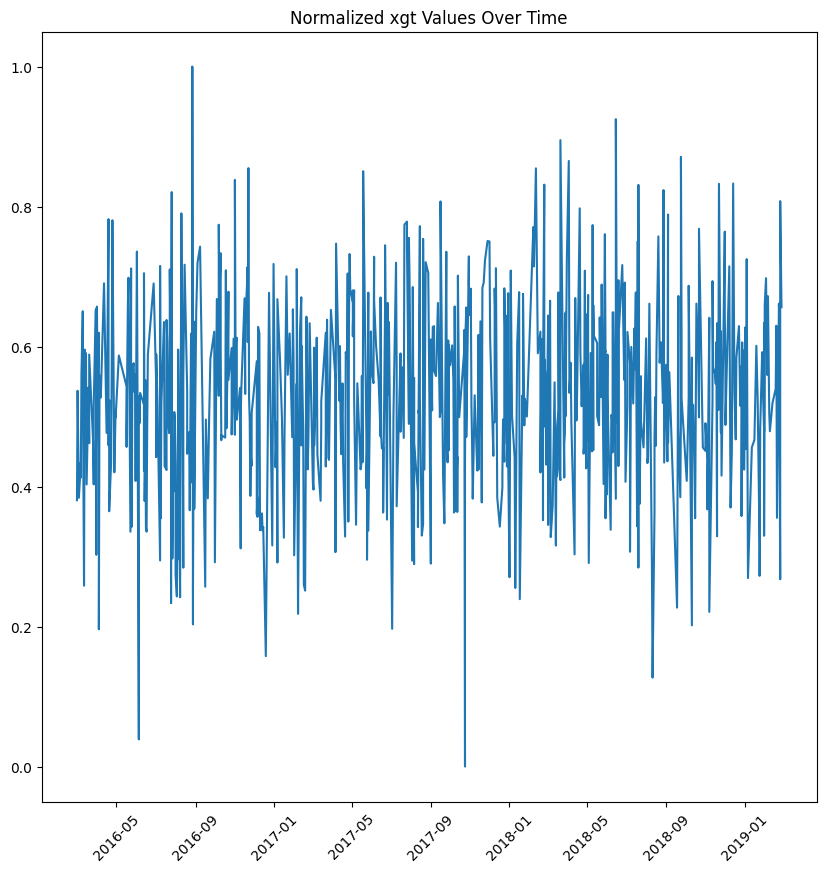

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the y-values between 0 and 1
scaler = MinMaxScaler()
dftrain_pd['xgt_normalized'] = scaler.fit_transform(dftrain_pd[['xgt']])

plt.figure(figsize=(10, 10))
plt.plot(dftrain_pd['date'], dftrain_pd['xgt_normalized'])
plt.xticks(rotation=45)
plt.title("Normalized xgt Values Over Time")
plt.show()

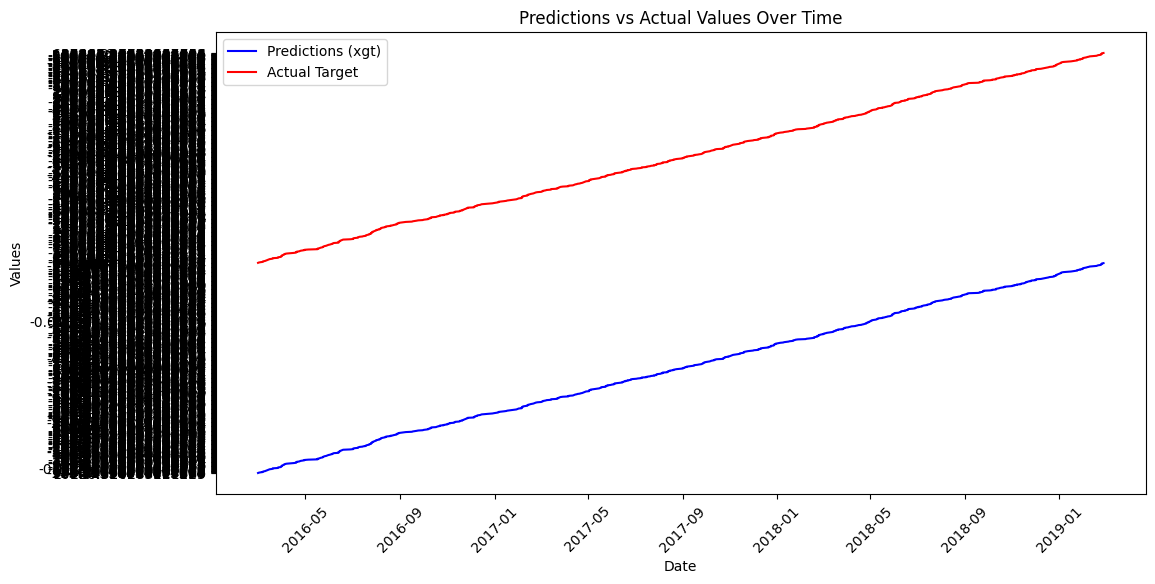

In [19]:
import matplotlib.pyplot as plt

# Plot xgt predictions and actual target values over time
plt.figure(figsize=(12, 6))
plt.plot(dftrain_pd['date'], dftrain_pd['xgt'], label="Predictions (xgt)", color='blue')
plt.plot(dftrain_pd['date'], dftrain_pd['target'], label="Actual Target", color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Predictions vs Actual Values Over Time')
plt.legend()
plt.show()


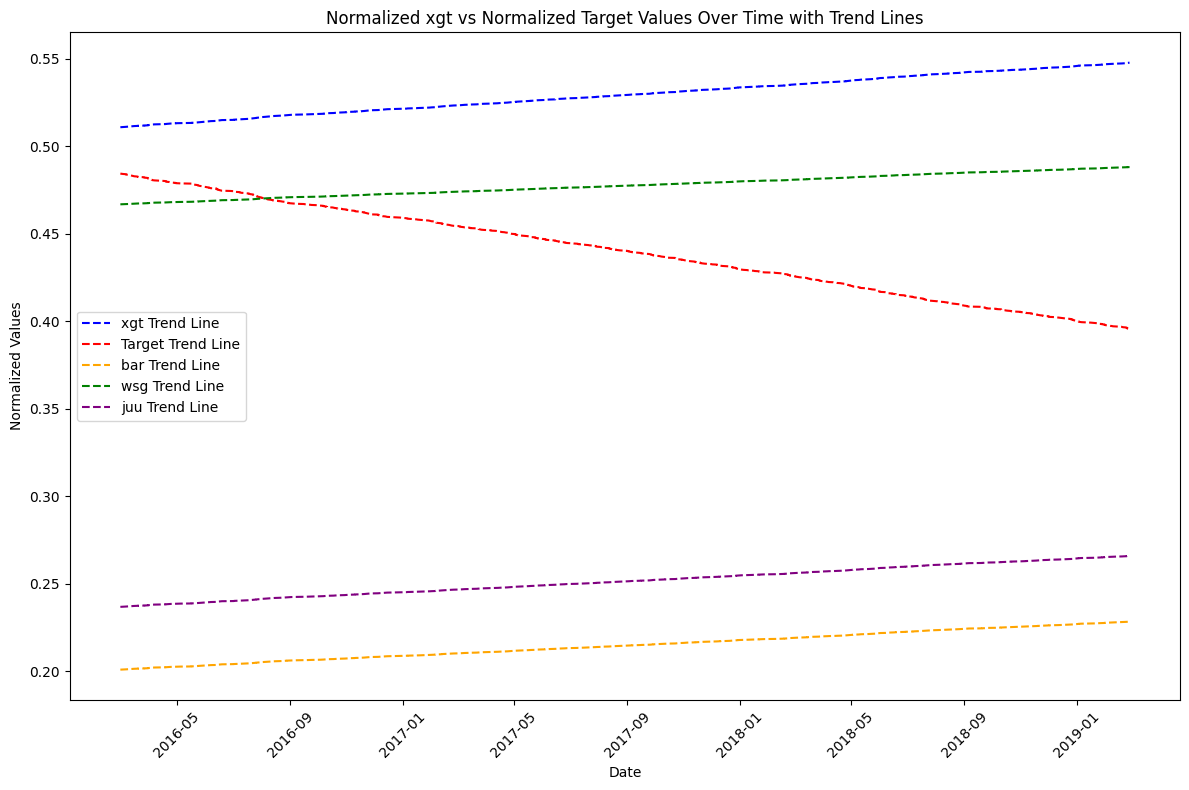

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats
import pandas as pd
# Ensure that 'date' is in datetime format
dftrain_pd['date'] = pd.to_datetime(dftrain_pd['date'])

# Normalize the xgt values between 0 and 1
scaler = MinMaxScaler()
dftrain_pd['xgt_normalized'] = scaler.fit_transform(dftrain_pd[['xgt']])

# Normalize the target values between 0 and 1 for comparison (optional, only if needed)
dftrain_pd['target_normalized'] = scaler.fit_transform(dftrain_pd[['target']])
dftrain_pd['bar_normalized'] = scaler.fit_transform(dftrain_pd[['bar']])
dftrain_pd['wsg_normalized'] = scaler.fit_transform(dftrain_pd[['wsg']])
dftrain_pd['juu_normalized'] = scaler.fit_transform(dftrain_pd[['juu']])

# Trend line fitting function
def fit_trend_line(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope * x + intercept

# Plotting both normalized xgt and target values
plt.figure(figsize=(12, 8))

# Plot the normalized xgt values and its trend line
plt.plot(dftrain_pd['date'], fit_trend_line(np.arange(len(dftrain_pd)), dftrain_pd['xgt_normalized']),
         label='xgt Trend Line', color='blue', linestyle='--')
# Plot the normalized target values and its trend line
#plt.plot(dftrain_pd['date'], dftrain_pd['target_normalized'], label='Normalized Target', color='red')
plt.plot(dftrain_pd['date'], fit_trend_line(np.arange(len(dftrain_pd)), dftrain_pd['target_normalized']),
         label='Target Trend Line', color='red', linestyle='--')
plt.plot(dftrain_pd['date'], fit_trend_line(np.arange(len(dftrain_pd)), dftrain_pd['bar_normalized']),
         label='bar Trend Line', color='orange', linestyle='--')
# Plot the trend line for wsg
plt.plot(dftrain_pd['date'], fit_trend_line(np.arange(len(dftrain_pd)), dftrain_pd['wsg_normalized']),
         label='wsg Trend Line', color='green', linestyle='--')
# Plot the trend line for juu
plt.plot(dftrain_pd['date'], fit_trend_line(np.arange(len(dftrain_pd)), dftrain_pd['juu_normalized']),
         label='juu Trend Line', color='purple', linestyle='--')
# Formatting the plot
plt.xticks(rotation=45)
plt.title("Normalized xgt vs Normalized Target Values Over Time with Trend Lines")
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Ensure date column is in datetime format
dftrain_pd['date'] = pd.to_datetime(dftrain_pd['date']).dt.strftime('%d/%m/%Y')

# Normalize the values
scaler = MinMaxScaler()
dftrain_pd['xgt_normalized'] = scaler.fit_transform(dftrain_pd[['xgt']])
dftrain_pd['target_normalized'] = scaler.fit_transform(dftrain_pd[['target']])
dftrain_pd['bar_normalized'] = scaler.fit_transform(dftrain_pd[['bar']])
dftrain_pd['wsg_normalized'] = scaler.fit_transform(dftrain_pd[['wsg']])
dftrain_pd['juu_normalized'] = scaler.fit_transform(dftrain_pd[['juu']])

# Trend line fitting function
def fit_trend_line(y_values):
    x = np.arange(len(y_values))
    slope, intercept, _, _, _ = stats.linregress(x, y_values)
    return slope * x + intercept

# Compute trendlines
dftrain_pd['xgt_trend'] = fit_trend_line(dftrain_pd['xgt_normalized'])
dftrain_pd['target_trend'] = fit_trend_line(dftrain_pd['target_normalized'])
dftrain_pd['bar_trend'] = fit_trend_line(dftrain_pd['bar_normalized'])
dftrain_pd['wsg_trend'] = fit_trend_line(dftrain_pd['wsg_normalized'])
dftrain_pd['juu_trend'] = fit_trend_line(dftrain_pd['juu_normalized'])

# Select relevant columns for Power BI
trendline_df = dftrain_pd[['date', 'xgt_trend', 'target_trend', 'bar_trend', 'wsg_trend', 'juu_trend']]
trend_df = pd.DataFrame(trendline_df)

# Save to Parquet
output_path = "/content/data.trends/trends.parquet"
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ensure the folder exists
trend_df.to_parquet(output_path, engine="pyarrow")

print(f"Trend line data saved to: {output_path}")

Trend line data saved to: /content/data.trends/trends.parquet


## Times Series Analysis

In [25]:
dftrain= spark.read.parquet("/content/data.parquet")
dftrain_pd = dftrain.toPandas()
dftrain_pd.head()
dftrain_pd=dftrain_pd.sort_values(by='date')
dftrain_pd.head()

,image,image class,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
425,training-img/dog/dog_50.jpg,dog,2016-03-01,-0.12567635124258875,0,-120.310277271567,8.081389660275091,6340.483433189771,0.008793308253032435,0.3036089957592274,-1320.7447086819518,2.4037560085228,33.53211778160956,0.17380456435578634,0,0,81.89463013077318,83.87508089360962,-59103.64460155461
336,training-img/person/person_17.jpg,person,2016-03-02,1169.0091090399308,1,101.04924183727225,17.77724211059358,7500.665166516652,0.007768665242891734,10.824537816305906,-2183.043399314943,-17.389844910238736,28.286081294268353,0.5006168403400091,0,0,-183.829224579679,65.61538036136622,106706.79379530798
462,training-img/cartoon/cartoon_2.jpg,cartoon,2016-03-04,0.19909157152551954,0,-115.41398696105094,5.627180757668055,5939.876687668767,0.008778198743314088,-5.953481694199498,-22.04624636661668,-2.1614627070970798,22.78727897347963,0.24532833691780773,1,0,-92.33672596372293,83.59004915195204,-30562.54800423415
591,training-img/dog/dog_13.jpg,dog,2016-03-07,285.24330733062743,1,-43.59953505913896,13.999778807068367,6356.146714671468,0.005560644949998638,-19.612724884888515,-507.15800639442693,-13.271725602984882,23.352777305620876,0.9337651281192896,0,0,-130.92024759726507,33.7496673666009,114078.79672308949
151,training-img/dog/dog_27.jpg,dog,2016-03-07,-86.46137691247394,0,-74.59790614614298,-9.813760398303469,5376.881188118812,0.011387293477968038,22.311303206005437,-3.5801176494917364,-11.976914532480142,50.208067150757245,0.46025342982710993,0,0,-385.3041787611934,139.67854857742003,112595.74342848387


          date  year
286 2019-02-24  2019
362 2019-02-24  2019
305 2019-02-25  2019
551 2019-02-25  2019
435 2019-02-27  2019


([0, 1, 2, 3],
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

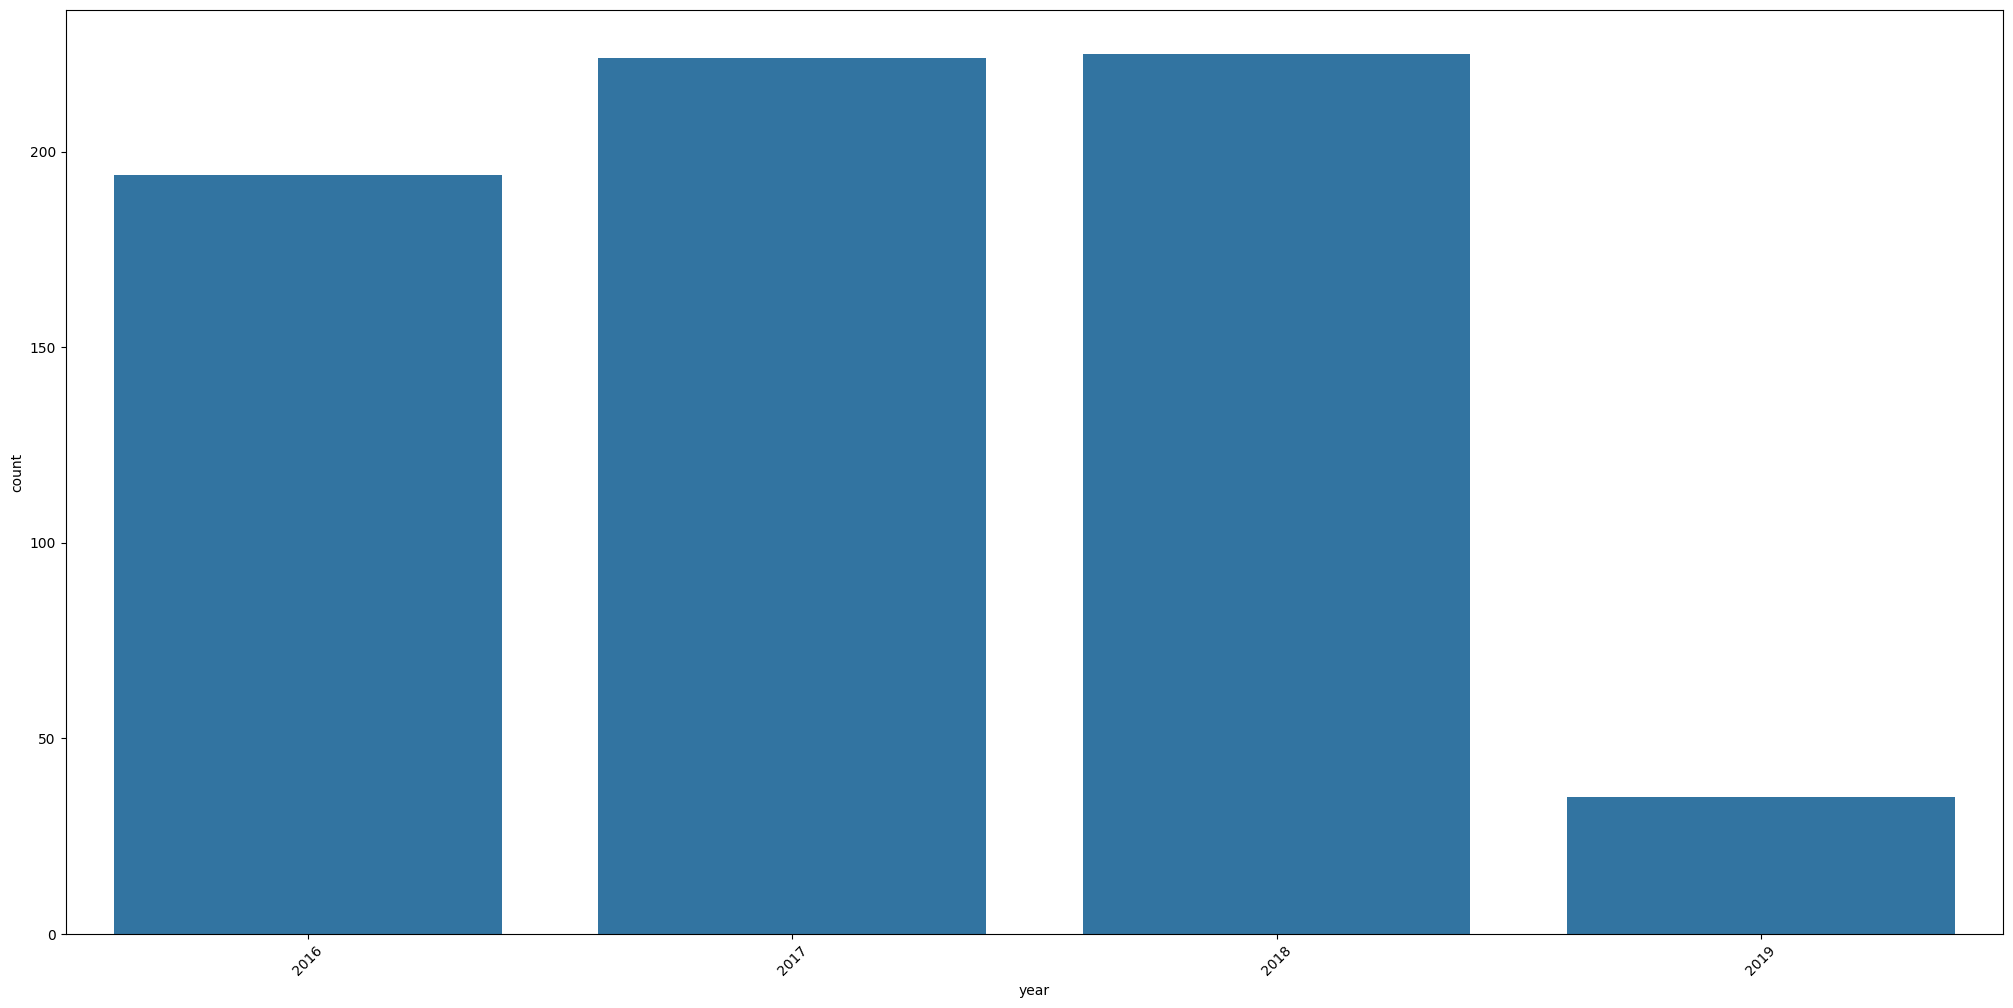

In [29]:
import seaborn as sns
# Convert 'date' to datetime format
dftrain_pd['date'] = pd.to_datetime(dftrain_pd['date'], errors='coerce')

# Now extract the year
dftrain_pd['year'] = dftrain_pd['date'].dt.year

# Display the updated dataframe
print(dftrain_pd[['date', 'year']].tail())
# Bar Chart to indicate the year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = dftrain_pd)
plt.xticks(rotation = 45)

In [30]:
dftrain_prophet = dftrain_pd[['date', 'xgt']]
dftrain_prophet

,date,xgt
425,2016-03-01,-120.310277271567
336,2016-03-02,101.04924183727225
462,2016-03-04,-115.41398696105094
591,2016-03-07,-43.59953505913896
151,2016-03-07,-74.59790614614298
...,...,...
286,2019-02-24,222.12361611994285
362,2019-02-24,19.406944269133973
305,2019-02-25,-280.1928845586492
551,2019-02-25,484.6822776482644


In [31]:
dftrain_prophet = dftrain_prophet.rename(columns={'date':'ds', 'xgt':'y'})
dftrain_prophet

,ds,y
425,2016-03-01,-120.310277271567
336,2016-03-02,101.04924183727225
462,2016-03-04,-115.41398696105094
591,2016-03-07,-43.59953505913896
151,2016-03-07,-74.59790614614298
...,...,...
286,2019-02-24,222.12361611994285
362,2019-02-24,19.406944269133973
305,2019-02-25,-280.1928845586492
551,2019-02-25,484.6822776482644


In [33]:
!pip install prophet  # If you have not already done so.
from prophet import Prophet
m = Prophet()
m.fit(dftrain_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt76rl9ws/d9gmr1kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt76rl9ws/6t28fvd6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99824', 'data', 'file=/tmp/tmpt76rl9ws/d9gmr1kc.json', 'init=/tmp/tmpt76rl9ws/6t28fvd6.json', 'output', 'file=/tmp/tmpt76rl9ws/prophet_model6y9lxh9h/prophet_model-20250211011024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
# Forcasting into the future
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-01,58.468914,-244.794789,275.748353,58.468914,58.468914,-50.006514,-50.006514,-50.006514,5.942152,5.942152,5.942152,-55.948666,-55.948666,-55.948666,0.0,0.0,0.0,8.462400
1,2016-03-02,58.528812,-263.886767,247.319823,58.528812,58.528812,-72.914347,-72.914347,-72.914347,-12.369511,-12.369511,-12.369511,-60.544836,-60.544836,-60.544836,0.0,0.0,0.0,-14.385535
2,2016-03-04,58.648609,-218.599095,277.570554,58.648609,58.648609,-39.195925,-39.195925,-39.195925,27.780174,27.780174,27.780174,-66.976098,-66.976098,-66.976098,0.0,0.0,0.0,19.452685
3,2016-03-07,58.828305,-251.256490,257.290145,58.828305,58.828305,-62.488280,-62.488280,-62.488280,6.561457,6.561457,6.561457,-69.049737,-69.049737,-69.049737,0.0,0.0,0.0,-3.659975
4,2016-03-08,58.888204,-241.647370,234.572677,58.888204,58.888204,-61.737129,-61.737129,-61.737129,5.942152,5.942152,5.942152,-67.679281,-67.679281,-67.679281,0.0,0.0,0.0,-2.848925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2021-02-22,163.854177,-65.080918,427.827486,163.496320,164.192173,1.426116,1.426116,1.426116,6.561457,6.561457,6.561457,-5.135341,-5.135341,-5.135341,0.0,0.0,0.0,165.280293
1231,2021-02-23,163.911228,-115.012643,407.110114,163.552732,164.249838,-7.088269,-7.088269,-7.088269,5.942152,5.942152,5.942152,-13.030421,-13.030421,-13.030421,0.0,0.0,0.0,156.822959
1232,2021-02-24,163.968279,-122.589947,381.197411,163.609145,164.307561,-33.249920,-33.249920,-33.249920,-12.369511,-12.369511,-12.369511,-20.880409,-20.880409,-20.880409,0.0,0.0,0.0,130.718360
1233,2021-02-25,164.025330,-136.678185,362.477637,163.665557,164.365283,-52.813131,-52.813131,-52.813131,-24.269120,-24.269120,-24.269120,-28.544011,-28.544011,-28.544011,0.0,0.0,0.0,111.212200


In [37]:
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast['ds'] = forecast['ds'].dt.strftime('%m/%d/%Y')
output_path = "/content/data.forecast/forecast.parquet"
# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)
# Save forecast results to Parquet format
forecast.to_parquet(output_path, engine="pyarrow")
print(f"Forecast results saved to: {output_path}")

Forecast results saved to: /content/data.forecast/forecast.parquet


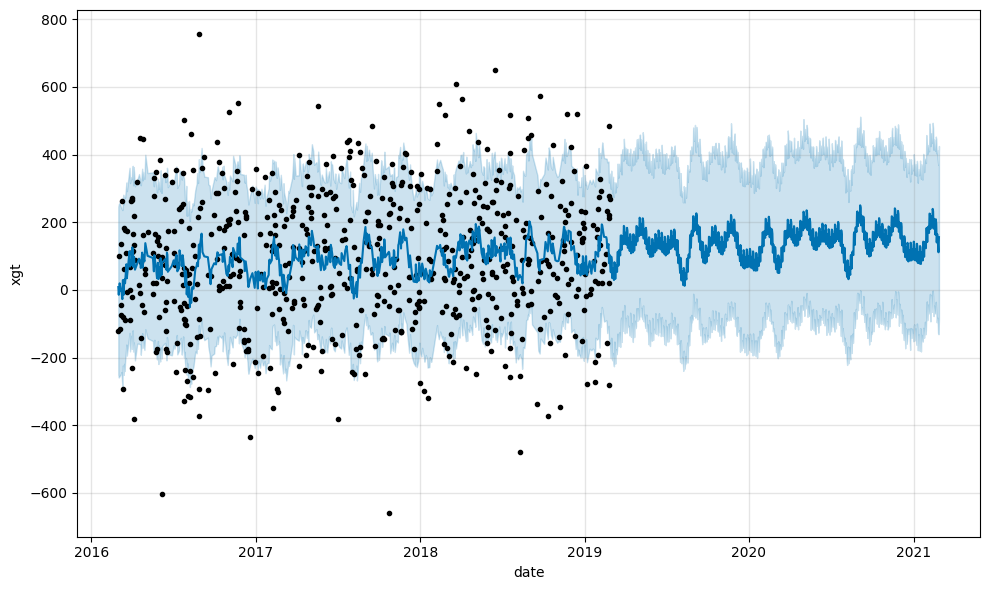

In [ ]:
figure = m.plot(forecast, xlabel='date', ylabel='xgt')

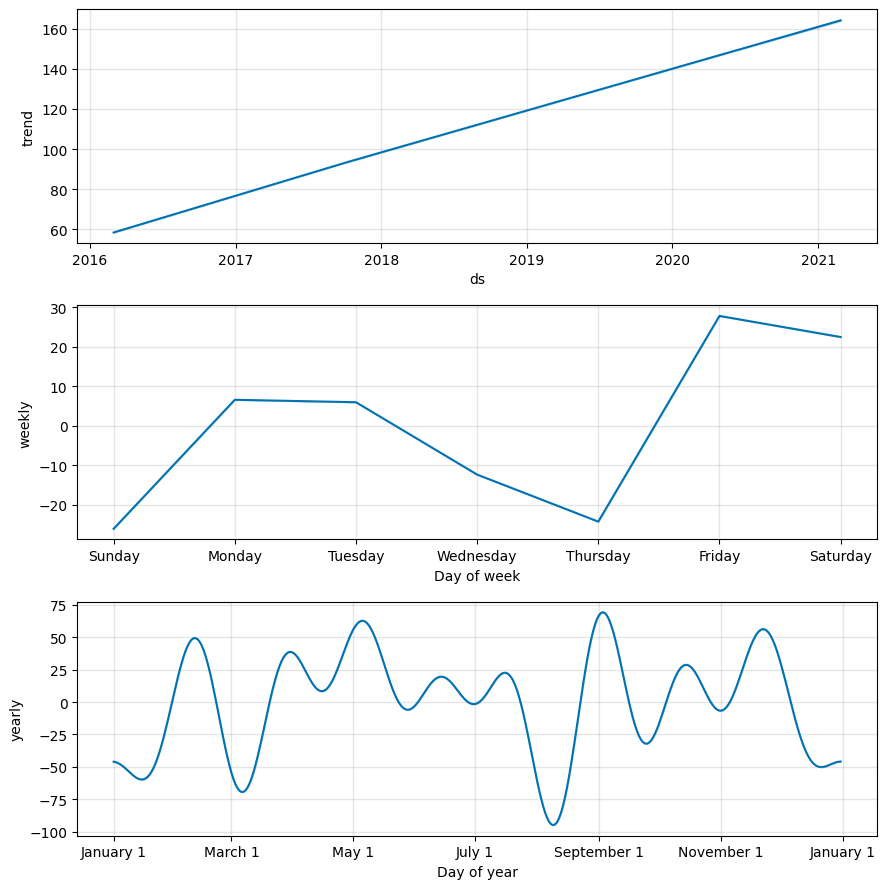

In [ ]:
figure3 = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt76rl9ws/yeil3ai4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt76rl9ws/i0hdsitd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36125', 'data', 'file=/tmp/tmpt76rl9ws/yeil3ai4.json', 'init=/tmp/tmpt76rl9ws/i0hdsitd.json', 'output', 'file=/tmp/tmpt76rl9ws/prophet_model9zunb9ic/prophet_model-20250211013750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


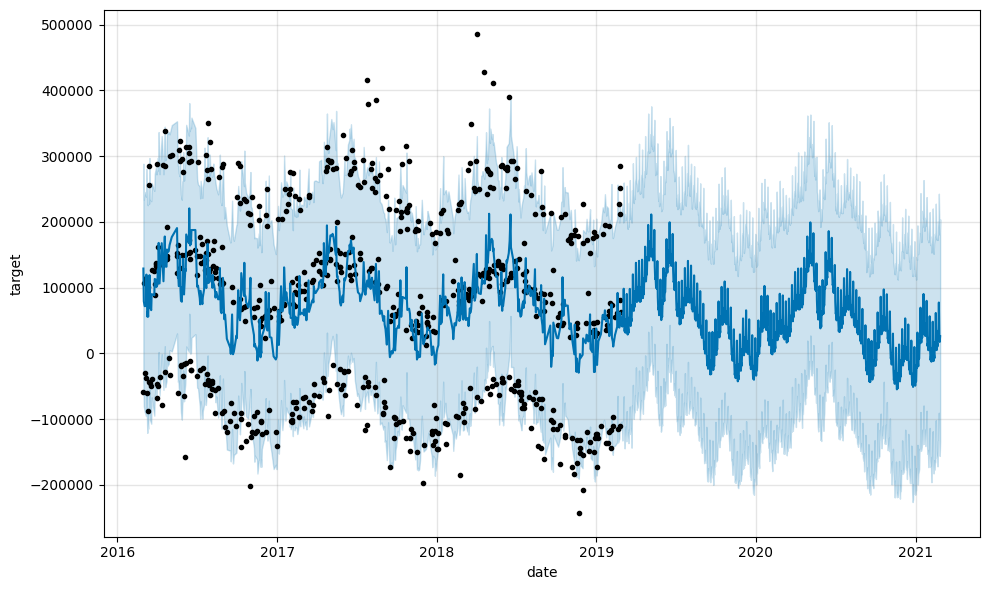

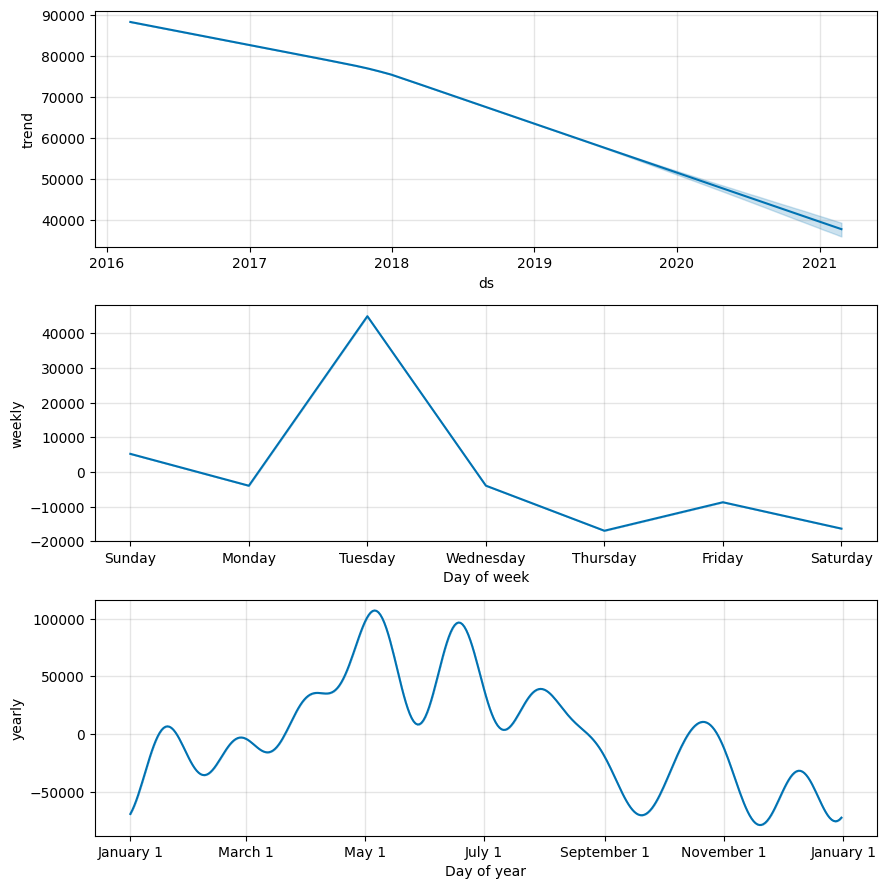

In [38]:
dftrain_prophet_target = dftrain_pd[['date', 'target']]
dftrain_prophet_target = dftrain_prophet_target.rename(columns={'date':'ds', 'target':'y'})
m_target = Prophet()
m_target.fit(dftrain_prophet_target)

 # Forcasting into the future
future_target = m_target.make_future_dataframe(periods=730)
forecast_target = m_target.predict(future_target)
figure_target = m_target.plot(forecast_target, xlabel='date', ylabel='target')
figure3_target = m_target.plot_components(forecast_target)

In [41]:
forecast_target['ds'] = pd.to_datetime(forecast_target['ds'])
forecast_target['ds'] = forecast_target['ds'].dt.strftime('%m/%d/%Y')

output_path = "/content/data.forecast_target/forecast_target.parquet"
# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)
# Save forecast results to Parquet format
forecast_target.to_parquet(output_path, engine="pyarrow")
print(f"Forecast results saved to: {output_path}")

Forecast results saved to: /content/data.forecast_target/forecast_target.parquet
